# Credit Risk Modeling Part I:
# Modeling and Validating the Probablity of Default (PD) Model:


# Introduction:

**Bank loan default is a classic use case where machine Learning(ML) models can be applied to predict risky customers and hence minimize losses of the lenders. Financial industry is highly regulated, thus applying ML models to classify of loan customers based on their behavior, demographics etc. is highly important.**

**Loans are risky but at the same time it is also a product that generates profits for the institution through differential borrowing/ lending rates.**

**The ML model should be explainable and be able to balance between risk and profits.**

**Credit risk modeling has three parts. These are probablity of default (PD), loss given default (LGD) and exposure at default (EAD). 
**Estimating and validating the probablity of default (PD) model is one component of the credit risk modelling. The goal of creditors is to lend money for borrowers and make the maximum profit out of it. However, in this process, differentiating the good and bad borrowers is the main challeng. Borrowers are classified as good if they paid their loan in the given scheduled period of time. On th other hand, bad borrowers refuse to pay their loan. This could happen mainly becuase they do not have enough income, job. However, it could be also becuase they are not willing to do so. In this project, I am going to predict PD model using many machine learning models.**  

**The ultimate goal of credit risk modeling is to estimate the expected credit risk loss. This project focuses on developing and validating the PD model.**




#  Modeling and Validating the Probablity of Default (PD) model

##  Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
import sklearn

##  Importing Data:
Now it is time to load our data.
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2018 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. I have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/denychaen/lending-club-loans-rejects-data


In [2]:
data=pd.read_csv(r'C:/Users/Betelehem Yaynie/Desktop/Machine Learning_Data Scientist/loan.csv', low_memory=False, nrows=800000)


##  Data Exploration:

In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,139007987,NaN,16000.0,16000.0,16000.0,36 months,22.35,613.95,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
799996,138873096,NaN,1500.0,1500.0,1500.0,36 months,14.47,51.61,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
799997,138941957,NaN,30000.0,30000.0,30000.0,36 months,7.84,937.88,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
799998,138397856,NaN,1000.0,1000.0,1000.0,36 months,23.40,38.92,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns.

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [6]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
799995,139007987,NaN,16000.0,16000.0,16000.0,36 months,22.35,613.95,D,D5,Oiler,< 1 year,RENT,50000.0,Verified,Aug-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,835xx,ID,18.58,0.0,Jun-2015,665.0,669.0,1.0,29.0,NaN,6.0,0.0,4350.0,59.6,12.0,w,14013.80,14013.80,3693.64,3693.64,1986.20,1707.44,0.0,0.0,0.0,Feb-2019,613.95,Apr-2019,Mar-2019,559.0,555.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,45200.0,2.0,3.0,2.0,3.0,5.0,40850.0,83.0,2.0,3.0,3998.0,72.0,7300.0,0.0,5.0,1.0,6.0,7533.0,2.0,100.0,0.0,0.0,38.0,35.0,4.0,4.0,0.0,4.0,NaN,0.0,29.0,0.0,1.0,2.0,1.0,1.0,7.0,3.0,5.0,2.0,6.0,0.0,0.0,0.0,4.0,91.7,100.0,0.0,0.0,51002.0,45200.0,4000.0,43702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
799996,138873096,NaN,1500.0,1500.0,1500.0,36 months,14.47,51.61,C,C2,Housekeeping Supervisor,10+ years,RENT,25000.0,Not Verified,Aug-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,vacation,Vacation,891xx,NV,19.06,0.0,Jan-2001,700.0,704.0,1.0,NaN,NaN,5.0,0.0,14696.0,61.0,5.0,w,1256.68,1256.68,358.86,358.86,243.32,115.54,0.0,0.0,0.0,Mar-2019,51.61,Apr-2019,Mar-2019,669.0,665.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,15836.0,0.0,1.0,0.0,1.0,19.0,1140.0,57.0,0.0,0.0,3814.0,61.0,24100.0,1.0,1.0,1.0,1.0,3167.0,9344.0,46.3,0.0,0.0,19.0,211.0,186.0,19.0,0.0,191.0,NaN,2.0,NaN,0.0,3.0,4.0,3.0,3.0,1.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,26100.0,15836.0,17400.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
data.columns.values
# Displays all column names.

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [8]:
# Check data size 
print("The data size is : {} ".format(data.shape)) 
print("\nThe number of observations in the data:{0} and the number of features in data:{1}".format(data.shape[0],data.shape[1])) # to know the total number of observationa and variables in our data set
           # it is always important to get the size of the data set both the number of cases (observations) and variables

print("\nSo the data set has :{0} rows and :{1} features".format(data.shape[0],data.shape[1]))

The data size is : (800000, 151) 

The number of observations in the data:800000 and the number of features in data:151

So the data set has :800000 rows and :151 features


In [9]:
# Checking Categorical Data
data.select_dtypes(include=['object']).columns

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [10]:
# Checking Numerical Data
data.select_dtypes(include=['int64','float64']).columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       ...
       'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=113)

In [11]:
# Lets See the Data type

In [12]:
catagorical = len(data.select_dtypes(include=['object']).columns)
numerical = len(data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', catagorical, 'categorical', '+',
      numerical, 'numerical', '=', catagorical+numerical, 'features')

Total Features:  38 categorical + 113 numerical = 151 features


##  Data Cleaning: Dealing with Missing Values:
As we can see the data is big size. The total number of cases are about 800K. The total number of variables are 151. Our next task is to filter only the variables that are relevant to the project. Our goal is to predict whether the borrower is defaulted or not. For this we need to get the variables that provides information on the status of the loan as the dependant variables and relevant predictors of the loan default. 

# Start Data Cleaning


* The success of any project hings on the quality of the input data used. Data cleaning and preparation is the biggest part in any data science, machine learning or research projects.
* It is very important to do it right and efficiently. 
* I always followed the following steps.


## Step 1: Remove any variables that has the total missing observation that is atleast  50 percent of the total observation
Note:
* It could be true that for some of the variables , the number of null values are very large. 
* And because it might change the actual distribution of the data, it is not appropriate to apply any imputation to fill the null values in these variables.
* As a result, it is recommended to remove these variables right away. 
* It is a good practise to start the data cleaning by removing these colomns that have many missing values. 
* By doing this, we can keep only the variables that have enough number of observations. 
* The threshold 50 percent is just arbitrary, it could depend on the type of the project. But, not go below 40 percent.

In [13]:
# To know the number of missing observations for each variables and sort descendingly.

print("The total number of all null values in each column sorted descendingly: \n{}".format (data.isnull().sum().sort_values(ascending=False)))

The total number of all null values in each column sorted descendingly: 
member_id                                     800000
desc                                          799949
orig_projected_additional_accrued_interest    796325
hardship_loan_status                          795412
hardship_payoff_balance_amount                795412
                                               ...  
tot_hi_cred_lim                                    8
tax_liens                                          8
pub_rec_bankruptcies                               8
acc_now_delinq                                     8
id                                                 0
Length: 151, dtype: int64


In [14]:
# Find Missing Ratio of Dataset
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
member_id,100.000000
desc,99.993625
orig_projected_additional_accrued_interest,99.540625
hardship_start_date,99.426500
hardship_end_date,99.426500
payment_plan_start_date,99.426500
hardship_length,99.426500
hardship_dpd,99.426500
hardship_loan_status,99.426500
hardship_payoff_balance_amount,99.426500


Text(0.5, 1.0, 'Percent missing data by feature')

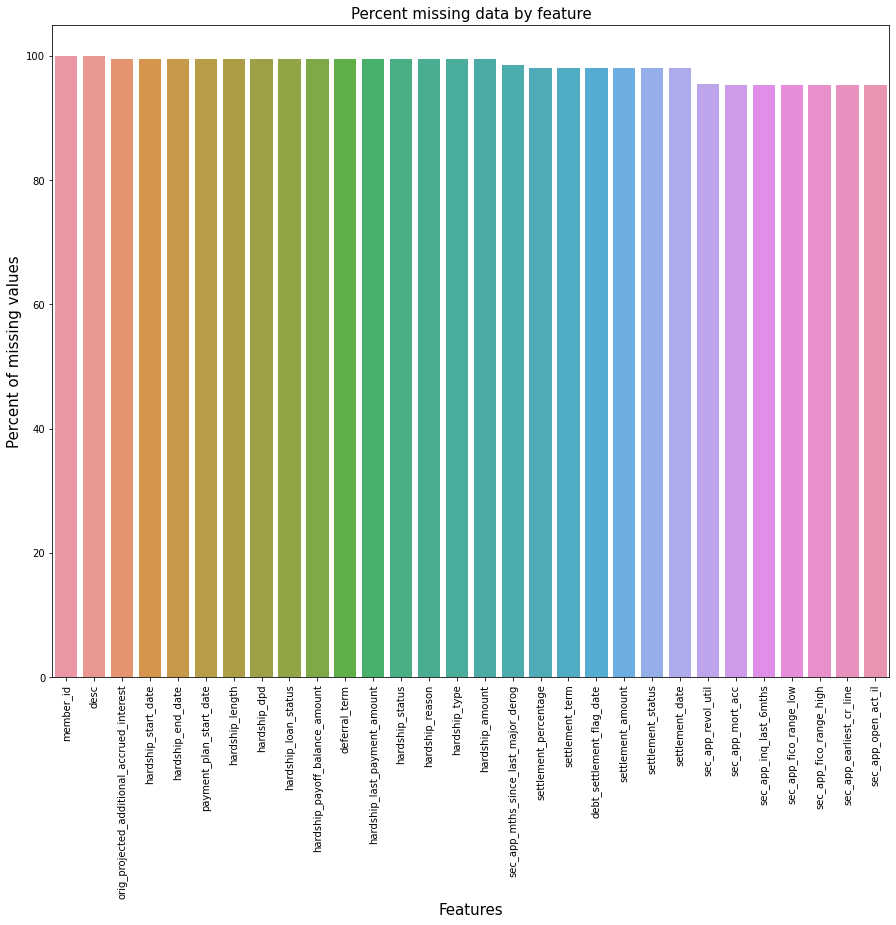

In [15]:
# Percent missing data by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [16]:
print("The total number of observations:{}".format(len(data))) # this gives the total number of cases or observations

The total number of observations:800000


In [17]:
fifty_percent=0.5*len(data) # calculate the 50 percent of the the data set

In [18]:
print("The total number of variables (columns) before cleaning:{}".format(data.shape[1]))   # It is better to know the size columns set before we apply the data cleaning

The total number of variables (columns) before cleaning:151


In [19]:
data.dropna(thresh=fifty_percent, axis=1, inplace=True) # drop any variable where atleasyt 50 percent of the observations are nul.                          

In [20]:
print("The total number of variables (columns) after cleaning:{}".format(data.shape[1]))  

# now we see the difference in the number of the variables as intially the number of varibales was 151 and now it is 105. Thus, becuase we delete the variables where the number of null or missing observation is greater than 50 %,  we eliminate many 


The total number of variables (columns) after cleaning:105


* Now we see the difference in the number of the variables as intially the number of varibales was 151 and now it is 105. 
* Thus, becuase we delete the variables where the number of null or missing observation is greater than 50 %,  we are able to reduce the size of our columns.

## Step 2: Consider Removing Other Variables  where the missing values are still too large to impute it.

In [21]:
# To make sure, we did it right. Lets check it again
print("The total number of all null values in each column sorted descendingly: \n{}".format (data.isnull().sum().sort_values(ascending=False)))


The total number of all null values in each column sorted descendingly: 
all_util                    399795
open_acc_6m                 399731
inq_fi                      399731
inq_last_12m                399731
max_bal_bc                  399731
                             ...  
chargeoff_within_12_mths         8
delinq_amnt                      8
mo_sin_old_rev_tl_op             8
mo_sin_rcnt_rev_tl_op            8
id                               0
Length: 105, dtype: int64


In [22]:


# Recheck the Missing Ratio of Dataset
# Find Missing Ratio of Dataset
all_data_na1 = (data.isnull().sum() / len(data)) * 100
all_data_na1 = all_data_na1.drop(all_data_na1[all_data_na1 == 0].index).sort_values(ascending=False)[:30]
missing_data1 = pd.DataFrame({'Missing Ratio' :all_data_na1})
missing_data1


,Missing Ratio
all_util,49.974375
open_acc_6m,49.966375
inq_fi,49.966375
inq_last_12m,49.966375
max_bal_bc,49.966375
open_rv_24m,49.966375
open_rv_12m,49.966375
total_bal_il,49.966375
open_il_24m,49.966375
open_il_12m,49.966375


Text(0.5, 1.0, 'Percent missing data by feature')

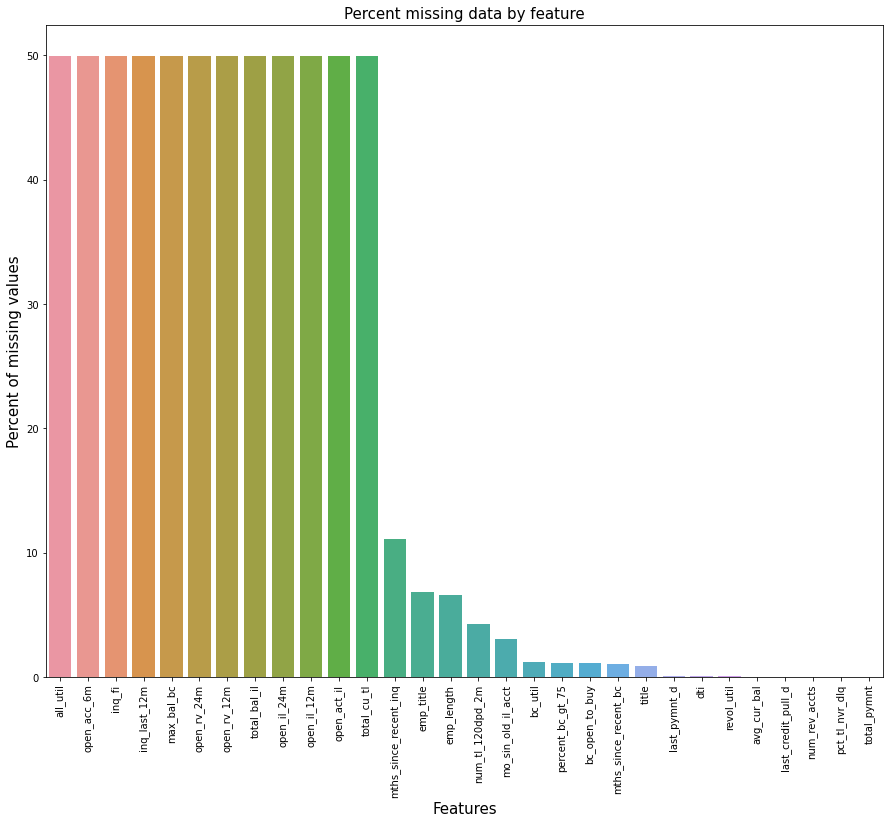

In [23]:
# Percent missing data by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na1.index, y=all_data_na1)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Observation:
- We were able to remove all the variables where the number of null values are greater than the total number of observations.
- However, still it looks like we will be better off dropping some more variables using some arbitirary rules. 
- Note that our total number of observations are 800k, but still we have few variables where the missing values are almost 400k. So we need to remove these variables where imputation is not reasonable.

In [24]:
data.dropna(thresh=500000, axis=1, inplace=True) # drop any variable where atleast 300k are nul.
                                               # In other words, drop any column where the non-null values are less than 500k.

In [25]:
# To make sure, we did it right. Lets check it again
print("The total number of all null values in each column sorted descendingly: \n{}".format (data.isnull().sum().sort_values(ascending=False)))

The total number of all null values in each column sorted descendingly: 
mths_since_recent_inq       88655
emp_title                   55026
emp_length                  52753
num_tl_120dpd_2m            34421
mo_sin_old_il_acct          24697
                            ...  
chargeoff_within_12_mths        8
delinq_amnt                     8
mo_sin_old_rev_tl_op            8
mo_sin_rcnt_rev_tl_op           8
id                              0
Length: 93, dtype: int64


# Observation:
**It is done correctly!**
- Now we can reasonably apply any imputation methods to fill the null values for the rest of the columns.

# Note:
*We have two options to clean the missing observations for the rest of the variables in the dataset. Option 1, removing the missing observations. This is easy but not always the right option. Option 2, replacing the missing observation with median or mean for continous varibles and replace it with its mode for catagorical varibles.* In this project, I wil go for option 2.

# Step 3: Imputing or Filling Missing Values:
- Once we remove the variables with very large numbers of missing values, we can impute the missing values for the rest of the varibles.
- A common method of imputation with numeric features is to replace missing values with the mean of the feature’s non-missing values. 
- If the data have outliers, you may want to use the median instead. 
- Becuase I did not remove the outliers yet, I will use median to impute the missing values for numerical features.
- Using the mode (most frequent values) is the most common approach to imputing categorical features, that is  replace missing values with the most common class. 
- Thus, we need first to separate the numerical and catagorical features.

In [26]:
# To get the data type for each of the variables
data.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
                               ...   
total_bc_limit                float64
total_il_high_credit_limit    float64
hardship_flag                  object
disbursement_method            object
debt_settlement_flag           object
Length: 93, dtype: object

In [27]:
# Select only numerical features
data.select_dtypes(include=['int64','float64']).columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       '

In [28]:
# The following are numerical features
numerical=data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']]

In [29]:
# Select only catagorical features
data.select_dtypes(include=['object']).columns

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [30]:
# The following are catagorical features
catagorical=data[['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag']]

In [31]:
catagorical_len = len(data.select_dtypes(include=['object']).columns)
numerical_len = len(data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', catagorical, 'categorical_len', '+',
      numerical, 'numerical_len', '=', catagorical+numerical, 'features')

Total Features:                 id        term grade sub_grade                    emp_title  \
0        68407277   36 months     C        C4                      leadman   
1        68355089   36 months     C        C1                     Engineer   
2        68341763   60 months     B        B4                 truck driver   
3        66310712   60 months     C        C5  Information Systems Officer   
4        68476807   60 months     F        F1          Contract Specialist   
...           ...         ...   ...       ...                          ...   
799995  139007987   36 months     D        D5                        Oiler   
799996  138873096   36 months     C        C2      Housekeeping Supervisor   
799997  138941957   36 months     A        A4           Marketing Director   
799998  138397856   36 months     E        E1                         Lead   
799999  138768873   36 months     B        B5                        Labor   

       emp_length home_ownership verification_

In [32]:
# Remove identifier (ID) becuase it does not help us for estimation 
catagorical.drop('id', axis=1, inplace=True)

C:\Users\Betelehem Yaynie\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
# Here we imputed the missing values of numerical features with the median values
numerical.fillna(numerical.median(), inplace=True)


C:\Users\Betelehem Yaynie\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [34]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
# Here we imputed the catagorical variables with the mode
catagorical=catagorical.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [35]:
# Lets select the dependent variable out of the catagorical variables
dependent=catagorical['loan_status']

In [36]:
catagorical.drop('loan_status', axis=1, inplace=True)

In [37]:
numerical.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,5.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.00,0.00,13708.948530,13708.95,11950.00,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0
6,20000.0,20000.0,20000.0,9.17,637.58,180000.0,14.67,0.0,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,0.00,0.00,21393.800000,21393.80,20000.00,1393.80,0.0,0.0,0.0,15681.05,654.0,650.0,0.0,1.0,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0
7,20000.0,20000.0,20000.0,8.49,631.26,85000.0,17.61,1.0,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,0.00,0.00,21538.508977,21538.51,20000.00,1538.51,0.0,0.0,0.0,14618.23,674.0,670.0,0.0,1.0,0.0,0.0,141601.0,14500.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.

In [38]:
catagorical.head(10)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Debt consolidation,605xx,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N
3,60 months,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,Sep-2008,w,Feb-2019,Mar-2019,Individual,N,Cash,N
4,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,N,Cash,N
5,36 months,C,C3,Veterinary Tecnician,4 years,RENT,Source Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,Oct-1987,w,May-2017,May-2017,Individual,N,Cash,N
6,36 months,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,550xx,MN,Jun-1990,f,Nov-2016,Mar-2019,Individual,N,Cash,N
7,36 months,B,B1,road driver,10+ years,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,293xx,SC,Feb-1999,w,Jan-2017,Mar-2019,Individual,N,Cash,N
8,36 months,A,A2,SERVICE MANAGER,6 years,RENT,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,160xx,PA,Apr-2002,w,Aug-2018,Mar-2019,Individual,N,Cash,N
9,36 months,B,B5,Vendor liaison,10+ years,MORTGAGE,Not Verified,Dec-2015,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,029xx,RI,Nov-1994,w,Apr-2017,Nov-2018,Individual,N,Cash,N


In [39]:
# let make sure we filled in all the missing values
print("The total number of all null values  for numerical features in each column sorted descendingly: \n{}".format (numerical.isnull().sum().sort_values(ascending=False)))

print("The total number of all null values for catagorical features in each column sorted descendingly: \n{}".format (catagorical.isnull().sum().sort_values(ascending=False)))

The total number of all null values  for numerical features in each column sorted descendingly: 
total_il_high_credit_limit    0
collection_recovery_fee       0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
                             ..
delinq_amnt                   0
chargeoff_within_12_mths      0
bc_util                       0
bc_open_to_buy                0
loan_amnt                     0
Length: 69, dtype: int64
The total number of all null values for catagorical features in each column sorted descendingly: 
debt_settlement_flag    0
disbursement_method     0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
verification_status     0
issue_d                 0
pymnt_plan              0
url                     0
purpose                 0
title                   0
zip_code                0
addr_state              0
earliest_cr_line        0
initial_list

**All missing values are imputed successfully for both numerical and catagorical variables.**
**Great!**

# Data Cleaning: Feature Engineering and Feature Selection

# Step 1: Removing Columns with only One Value:


In [40]:
catagorical=catagorical.loc[:,catagorical.apply(pd.Series.nunique)!=1]

In [41]:
numerical=numerical.loc[:,numerical.apply(pd.Series.nunique)!=1]

# Step 2: Dealing with some Numerical features that are wrongly reported as catagorical

# It is always good to check if the catagorical values do not have many catagories.

In [42]:
# to get the unique catagories in the catagorical variables
for col in catagorical.columns:
    print(catagorical[col].value_counts())

 36 months    555972
 60 months    244028
Name: term, dtype: int64
C    231008
B    229333
A    156857
D    111917
E     51602
F     14579
G      4704
Name: grade, dtype: int64
C1    50535
B5    47550
B4    47108
C2    46919
B3    46643
C3    46507
C4    46321
B1    44024
B2    44008
A5    41191
C5    40726
A4    34483
A1    31005
D1    27934
A3    25166
A2    25012
D2    24023
D3    22041
D4    19903
D5    18016
E1    12090
E2    11893
E3    10630
E4     8568
E5     8421
F1     4575
F2     3261
F3     2711
F4     2179
F5     1853
G1     1462
G2      972
G3      844
G4      753
G5      673
Name: sub_grade, dtype: int64
Teacher                     70183
Manager                     13290
Owner                        8588
Registered Nurse             6109
RN                           5772
                            ...  
Veteran Service Rep.            1
firefighter/emt                 1
VP, Channel Sales & Mktg        1
Culinary tech                   1
Front End Cash Asst             1

#  Lets Prepare few variables from catagorical in to numerical

In [43]:
catagorical['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year'],
      dtype=object)

In [44]:
catagorical['emp_length_int'] = catagorical['emp_length'].str.replace('\+ years', '')
catagorical['emp_length_int'] = catagorical['emp_length_int'].str.replace('< 1 year', str(0))
catagorical['emp_length_int'] = catagorical['emp_length_int'].str.replace('n/a',  str(0))
catagorical['emp_length_int'] = catagorical['emp_length_int'].str.replace(' years', '')
catagorical['emp_length_int'] = catagorical['emp_length_int'].str.replace(' year', '')
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [45]:
type(catagorical['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

In [46]:
catagorical['emp_length_int'] = pd.to_numeric(catagorical['emp_length_int'])
# Transforms the values to numeric.

In [47]:
type(catagorical['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [48]:
# now drop the original variables because we created a new variable for them
catagorical.drop('emp_length', axis=1, inplace=True)

In [49]:
emp_length=catagorical['emp_length_int']

In [50]:
# Lets concatinate the numerical version of "empl_length" to the numerical; features
numerical=pd.concat([numerical, emp_length], axis=1)

In [51]:
numerical.columns.to_list()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_

# Step 3: Drop a few Columns which are least useful to the analysis

In [52]:
catagorical.columns.values

array(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag', 'emp_length_int'], dtype=object)

In [53]:
drop_columns=['sub_grade', 'pymnt_plan', 'hardship_flag', 'title','emp_title','issue_d','url', 'emp_length_int', 'zip_code', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d']

In [54]:
catagorical.drop(drop_columns, axis=1, inplace=True)

In [55]:
# Check if we removed the unwanted columns
catagorical.columns.values

array(['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'application_type', 'disbursement_method',
       'debt_settlement_flag'], dtype=object)

**These are the discrete variables in our data.**

# Step 4: Reducing columns (variables) by combining similar variables

here below, I am going to compute features from the exisitng features, which is called feature enginering. Specifically, fisco_range_ related varibles can be combined to create single feature, is the varibles combination. 

In [56]:
numerical['fisco_average']=(numerical['fico_range_high']+numerical['fico_range_low'])/2

In [57]:
drop_fisco=['fico_range_low', 'fico_range_high','last_fico_range_low','last_fico_range_high']

In [58]:
numerical=numerical.drop(drop_fisco, axis=1)

# Step 5: Dealing with Catagorical Variables: Dummy Variable  Creation

- It is very common that there are many non-numerical features in a data.
- These varibles are catagorical and are difficult for machine learing algorithms to process it easly. 
- Thus, we need to convert it to the numerical variables which is convinent for machine learing algorithms.
- The processing of converting catagorical varibles in to numerical varibles is called dummmy varible creation. 
- There are two libraries for this: get.dummy from Pandas library and one-hot-encoder from Scikit learn.
- The get.dummy () function creates the dummy variable for each catagory in the catagorical varible.

- For a k catagoy catagorical variable, we will have kdummy variables.

- However, we will not use all of the dummy varibles that are created from the same catagorical varibles. 
- For a k catagoy catagorical variable, we wil need only k-1 dummy variables and we need to drop any one of the catagorical variables and it can be used as the reference group.
- The reason for doing this is that because there is aproblem called dummy variable trap that is occured when we include two or more highly correlated variables in the given machine learing model.
- TO do this we can add, drop_first=True in the get_dummy function.  
- Note that there are some machine learning models that are capable of managing the dummy variable trap automatically, such as the Decion tree models, the supper vector machine, the pricipal component algorithms. However, the logistic regression and the linear regression are typically affected by the dummy variable trap.

**As the first step in the discrete varibles data processing, lets create the dummy varibles for each of the catagorical varibles. We can do it using the 'get_dummies' from pandas. Here below, I created the dummy variables for all discrete variables in the data.**

In [59]:
# Create dummy variables from catagorical variables.
# We create dummy variables from all original catagorical independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.
dummy_catagorical=pd.get_dummies(catagorical, prefix_sep = '_',drop_first=True)

In [60]:
dummy_catagorical.head(10)

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
dummy_catagorical.columns.values
# Displays all catagorical dummy column names.

array(['term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA',
       'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE',
       'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'ad

# Note:
- For a k catagoy catagorical variable, we will have kdummy variables.

- However, we will not use all of the dummy varibles that are created from the same catagorical varibles. 
- For a k catagoy catagorical variable, we wil need only k-1 dummy variables and we need to drop any one of the catagorical variables and it can be used as the reference group.
- The reason for doing this is that because there is aproblem called dummy variable trap that is occured when we include two or more highly correlated variables in the given machine learing model.
- TO do this we can add, drop_first=True in the get_dummy function.  
- However, it may not be always convinient to drop the first catagory as the referece. So we need to do it manually as follows.
- Note that there are some machine learning models that are capable of managing the dummy variable trap automatically, such as the Decion tree models, the supper vector machine, the pricipal component algorithms. However, the logistic regression and the linear regression are typically affected by the dummy variable trap.

In [62]:
dummy_catagorical.head(10)

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# The Probablity of  Default (PD) model

#  Dependent Variable: Loan Default Definition:

**The dependent varibale in the modelling the PD model  is binary indicator that shows whther the loan is defaulted or not. In our data, it is given in the "loan_status" column. It consists of many catagories. Therefore, we need to processes it sothat we will have a 0-1 dummy varible. To better and precisly estimate the PD model,  we will remove all loans that are neither defaulted nor non-defaulted. This includes loans that are currently active, passed due less than 90 days... Then, we create a dummy variable that has two values, 0 and 1 to show either the loan is defaulted or not. In this project, the loan is defualted if either it is charged off, defaulted or overdue. defaulted loan is called bad loan. On the ohter hand, the loan is non-defaulted when it is repaid on time. This loan is claaed good loan.**



#  We need to concatinate the catagorical and numerical features from above.

In [63]:
# The dimension of processed numerical features
numerical.shape

(800000, 66)

In [64]:
# The dimension of processed dummy variables created from catagorical varibales
dummy_catagorical.shape

(800000, 78)

In [65]:
# This the dependent variable, we are going to process here below
dependent.shape

(800000,)

In [66]:

data=pd.concat([numerical, dummy_catagorical, catagorical, dependent], axis=1)

In [67]:
# The dimension of pre-processed all variables of the dataset
data.shape

(800000, 154)

In [68]:
data.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'n

In [69]:
data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [70]:
data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

Fully Paid            401248
Current               280205
Charged Off           106866
Late (31-120 days)      7421
In Grace Period         2801
Late (16-30 days)       1445
Default                   14
Name: loan_status, dtype: int64

In [71]:
data['loan_status'].value_counts() / data['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

Fully Paid            0.501560
Current               0.350256
Charged Off           0.133582
Late (31-120 days)    0.009276
In Grace Period       0.003501
Late (16-30 days)     0.001806
Default               0.000017
Name: loan_status, dtype: float64

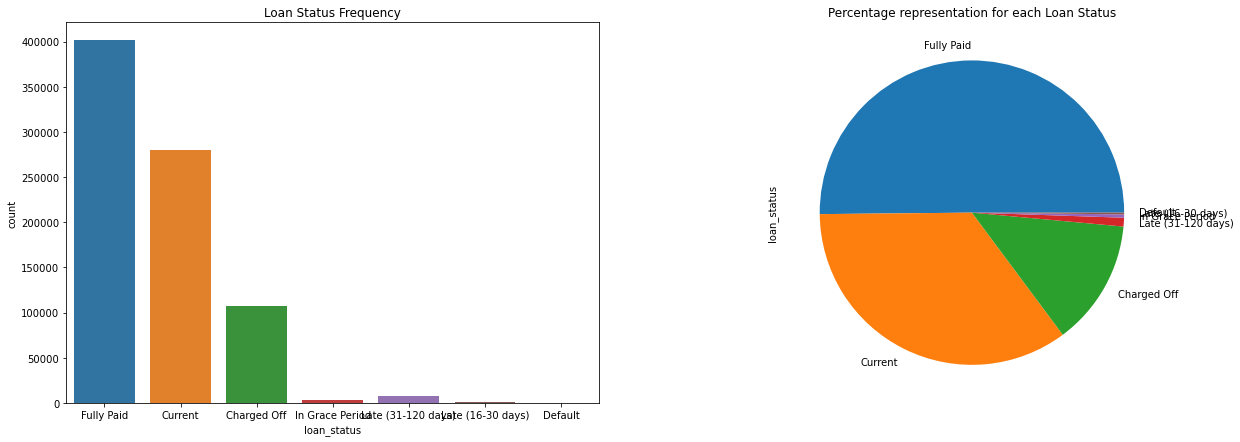

In [72]:
# lets visualize the target variable
fig, axs =plt.subplots(1,2, figsize=(21,7))
sns.countplot(x='loan_status',data=data, ax=axs[0])
axs[0].set_title("Loan Status Frequency")
axs[1].set_title("Percentage representation for each Loan Status")
data.loan_status.value_counts().plot(x=None, y=None, kind='pie', ax=axs[1])
plt.show()

In [73]:
data['loan_status'].describe()

count         800000
unique             7
top       Fully Paid
freq          401248
Name: loan_status, dtype: object

In [74]:
# drop observations neither defaulted nor fully paid
data=data[~(data["loan_status"].isin(['Current','Late (31-120 days)', 'Late (16-30 days)','In Grace Period']))]

In [75]:
# # Good/ Bad Definition
data['good_bad']=np.where(data['loan_status'].isin(['Charged Off', 'Default']), 1, 0)
# # We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met

In [76]:
data.loc[:,data.apply(pd.Series.nunique)!=1]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,fisco_average,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y,term,grade,home_ownership,verification_status,purpose,addr_state,application_type,disbursement_method,debt_settlement_flag,loan_status,good_bad
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,0.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,10,677.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36 months,C,MORTGAGE,Not Verified,debt_consolidation,PA,Individual,Cash,N,Fully Paid,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,0.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,10,717.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36 months,C,MORTGAGE,Not Verified,small_business,SD,Individual,Cash,N,Fully Paid,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,0.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,10,697.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [77]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

In [78]:
# Now we do not need the loan_status variable any more
data=data.drop('loan_status', axis=1)

In [79]:
# Lets see the data  size of our cleaned defaulted only borrowers
print("The numbers of borrowers in the data set: {0} and the number of variables: {1}".format(data.shape[0], data.shape[1]))

The numbers of borrowers in the data set: 508128 and the number of variables: 154


In [80]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [81]:
# double check if we still have a missing observations
print(" The numbers of missing observations in each variable: {}".format(data.isnull().sum().sort_values(ascending=False)))

 The numbers of missing observations in each variable: good_bad                               0
num_op_rev_tl                          0
num_tl_op_past_12m                     0
num_tl_90g_dpd_24m                     0
num_tl_30dpd                           0
num_tl_120dpd_2m                       0
num_sats                               0
num_rev_tl_bal_gt_0                    0
num_rev_accts                          0
num_il_tl                              0
mo_sin_rcnt_tl                         0
num_bc_tl                              0
num_bc_sats                            0
num_actv_rev_tl                        0
num_actv_bc_tl                         0
num_accts_ever_120_pd                  0
mths_since_recent_inq                  0
mths_since_recent_bc                   0
pct_tl_nvr_dlq                         0
percent_bc_gt_75                       0
pub_rec_bankruptcies                   0
tax_liens                              0
home_ownership_NONE                    0
ho

In [82]:
data.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'n

In [83]:
data=data.drop(catagorical, axis=1)

# Explore Dependent Variables:

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

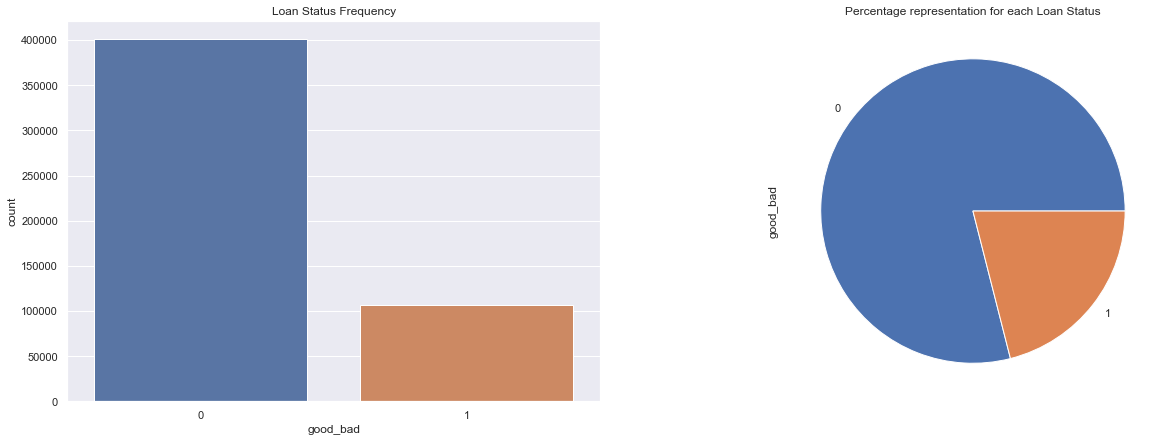

In [85]:
# lets visualize the target variable
fig, axs =plt.subplots(1,2, figsize=(21,7))
sns.countplot(x='good_bad',data=data, ax=axs[0])
axs[0].set_title("Loan Status Frequency")
axs[1].set_title("Percentage representation for each Loan Status")
data.good_bad.value_counts().plot(x=None, y=None, kind='pie', ax=axs[1])
plt.show()

# Estimating the PD Model: Machine Learning and Deep Learning:
 * As required in any modeling, we will estimate or train the model on the training data and test or validate it on the test data.
 * Thus, we need to split the data in to training and test dataset.

#  7. Splitting Data: Training and Test Data

- So far, we worked cleaning the data nicely. And it is ready to be used in the machine learning algorithm. 
- The next step is dividing the data in to training and test data. 
- While the training data is for training the model, the test data is for validating the trained model. 
- There are two approaches: the validation set and the cross validation.
- Splitting a dataset randomly into training and test datasets divides it into smaller sets for building up and validating a model. 
- This is useful for cross-validation. Often times the test set be 20% of the entire data set and the remaining 80% will be the training set.

In [86]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [87]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('good_bad', axis = 1), data['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [88]:
x_train.shape
# Displays the size of the dataframe.

(406502, 144)

In [89]:
y_train.shape
# Displays the size of the dataframe.

(406502,)

In [90]:
x_test.shape
# Displays the size of the dataframe.

(101626, 144)

In [91]:
y_test.shape
# Displays the size of the dataframe.

(101626,)

In [92]:
features_train=x_train
target_train=y_train
features_test=x_test
target_test=y_test

# Training  and Validating the Model and  Make Prediction:
* In this project, several machine learning models will be trained and finally comparision will be done based on their prediction performance on the test data.
* I will start with the Decision Tree Models such as Decision Tree, Random Forest and Gradient Boosting. Decision tree models do not require normalizing the features.

# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(features_train, target_train)
target_pred = dtc.predict(features_test)
predicted_probas = dtc.predict_proba(features_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.9973628795780607

In [95]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[80164,   128],
       [  140, 21194]], dtype=int64)

In [96]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(80164, 128, 140, 21194)

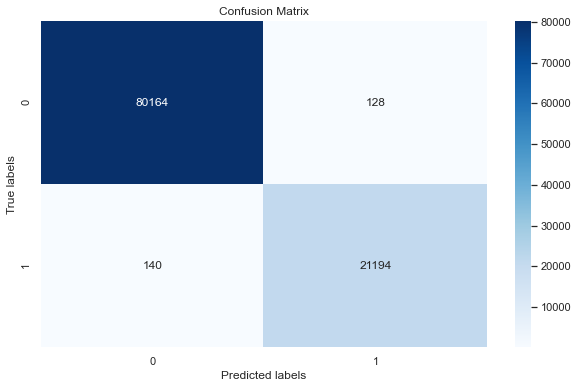

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [98]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.9973628795780607

In [99]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.9934377050717165

In [100]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9984058187615205

In [101]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.9939968108057405

In [102]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9982566248256625

In [103]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.006003189194259462

In [104]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.9937171792948237

In [105]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.9959217619166185

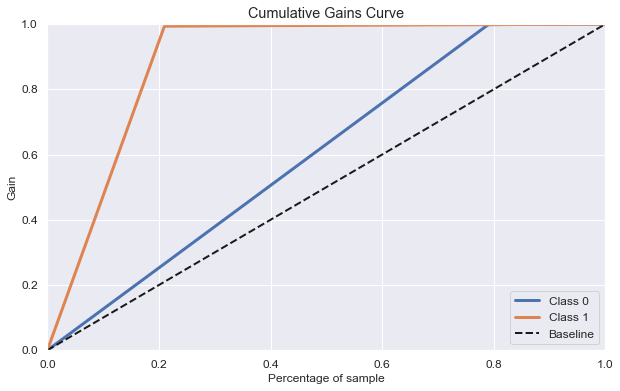

In [106]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

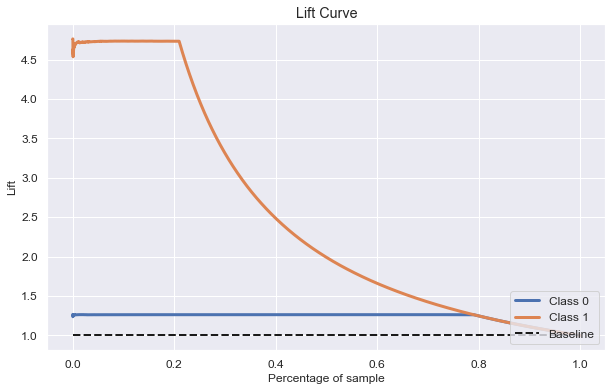

In [107]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

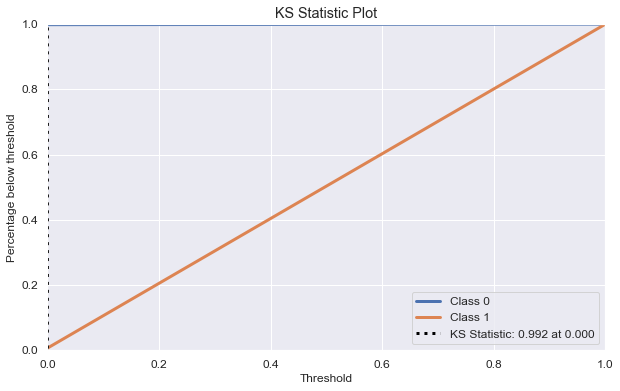

In [108]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

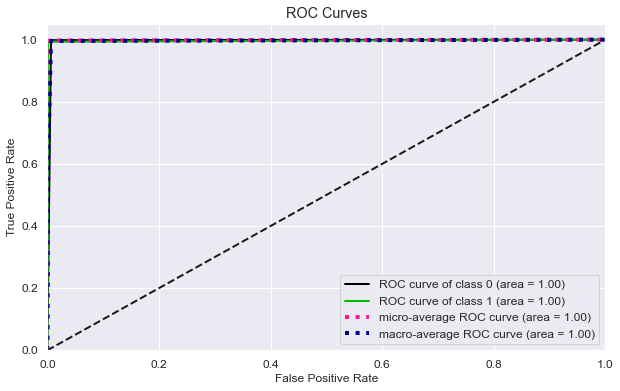

In [109]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Random Forest

In [110]:

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(features_train, target_train)

y_pred=rfc.predict(features_test)
predicted_probas=rfc.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [111]:

# Extract feature importances
features = list(data.columns)
features.remove('good_bad')
feature_importance_values = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances 

,feature,importance
0,loan_amnt,0.031968
1,funded_amnt,0.033871
2,funded_amnt_inv,0.031351
3,int_rate,0.009745
4,installment,0.033364
5,annual_inc,0.001456
6,dti,0.001937
7,delinq_2yrs,0.000276
8,inq_last_6mths,0.000548
9,open_acc,0.000769


In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, y_pred)

0.9955523192883711

In [113]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, y_pred)
cnf_matrix

array([[80292,     0],
       [  452, 20882]], dtype=int64)

In [114]:

TN, FP, FN, TP = confusion_matrix(target_test, y_pred).ravel() 
TN, FP, FN, TP

(80292, 0, 452, 20882)

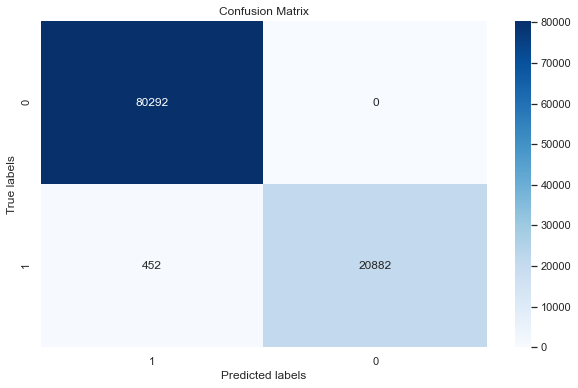

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [116]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.9788131620886847

In [117]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity


1.0

In [118]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

1.0

In [119]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9944020608342415

In [120]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.0

In [121]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.9892931589918514

In [122]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, y_pred)

0.9894065810443424

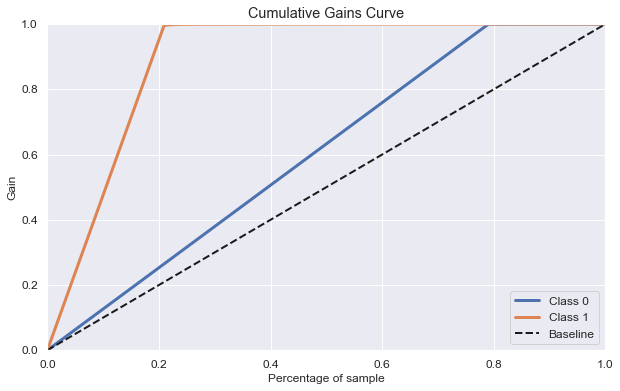

In [123]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

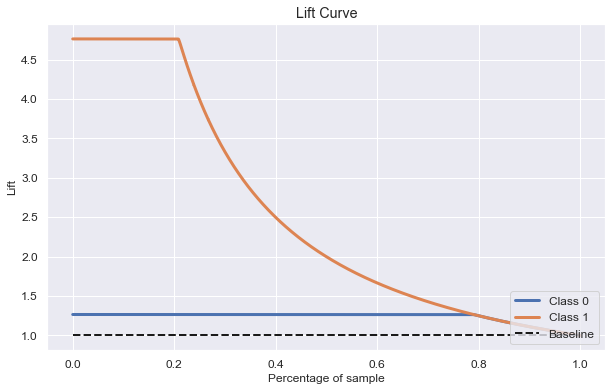

In [124]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

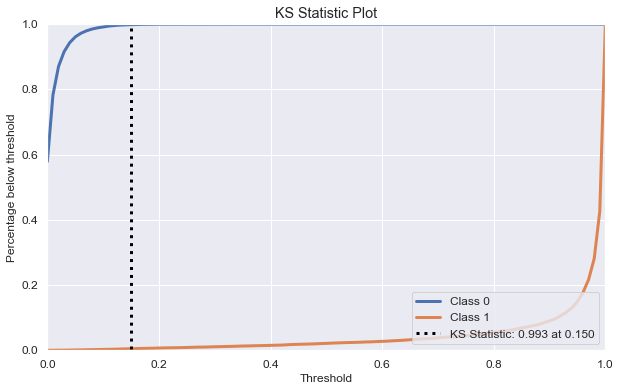

In [125]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

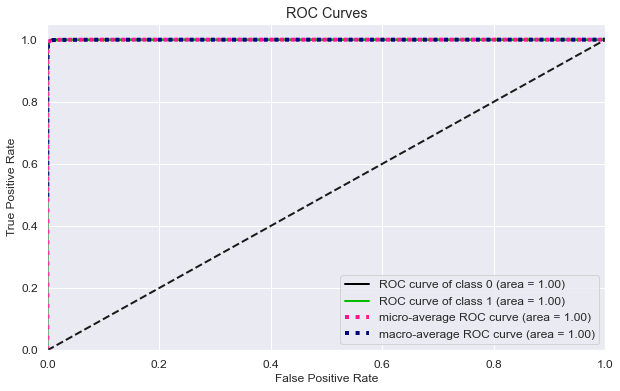

In [126]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

In [127]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 30 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['importance_normalized'].head(30), 
            align = 'center', edgecolor = 'k')
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['feature'].head(30))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

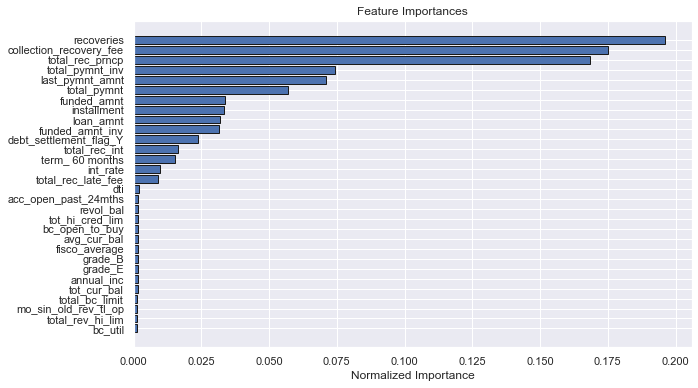

In [128]:
feature_importances_sorted = plot_feature_importances(feature_importances)

# Gradient Boosting Machine (GBM)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_depth = 3, random_state = 0)
    gb.fit(features_train, target_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(features_train, target_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(features_test, target_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.988
Accuracy score (validation): 0.989

Learning rate:  0.1
Accuracy score (training): 0.994
Accuracy score (validation): 0.994

Learning rate:  0.25
Accuracy score (training): 0.998
Accuracy score (validation): 0.998

Learning rate:  0.5
Accuracy score (training): 0.999
Accuracy score (validation): 0.998

Learning rate:  0.75
Accuracy score (training): 0.999
Accuracy score (validation): 0.998

Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): 0.998



In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
#Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.75, max_depth = 3, random_state = 0)
gb.fit(features_train, target_train)
predictions = gb.predict(features_test)
predict_probs = gb.predict_proba(features_test)

print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))
print()
print("Classification Report")
print(classification_report(target_test, predictions))


Confusion Matrix:
[[80263    29]
 [  124 21210]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80292
           1       1.00      0.99      1.00     21334

    accuracy                           1.00    101626
   macro avg       1.00      1.00      1.00    101626
weighted avg       1.00      1.00      1.00    101626



In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions)

0.9984944797591168

In [134]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions)
cnf_matrix

array([[80263,    29],
       [  124, 21210]], dtype=int64)

In [135]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions).ravel() 
TN, FP, FN, TP

(80263, 29, 124, 21210)

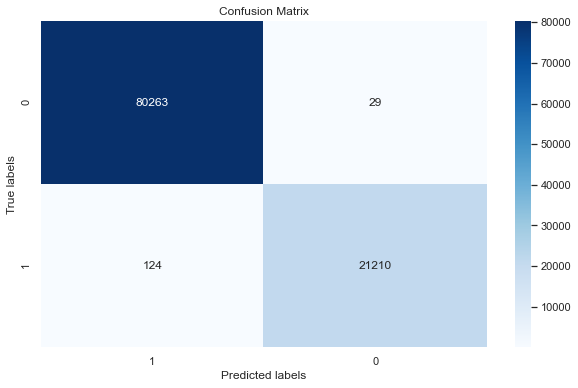

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1']);

In [137]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.9941876816349489

In [138]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9996388183131569

In [139]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.998634587315787

In [140]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9984574620274422

In [141]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.0013654126842129743

In [142]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.9964061729265028

In [143]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions)

0.9969132499740528

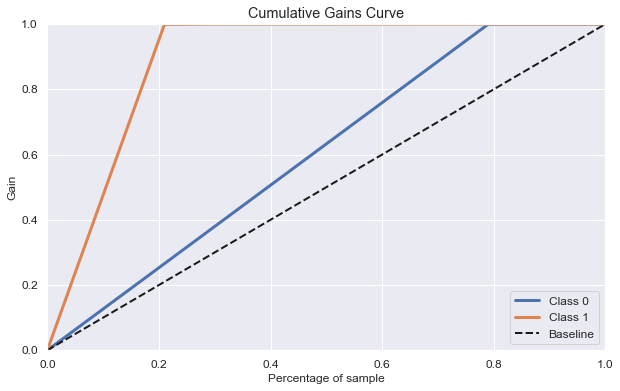

In [144]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predict_probs)
plt.show()

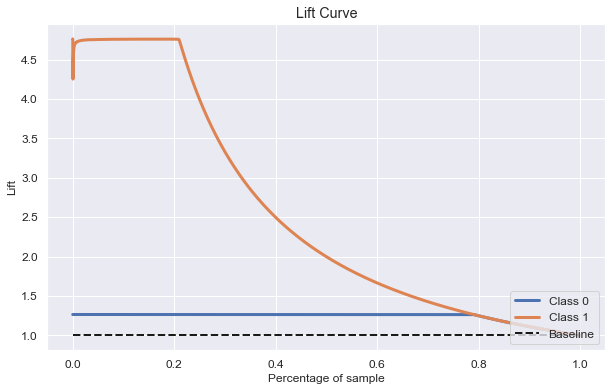

In [145]:
skplt.metrics.plot_lift_curve(target_test, predict_probs)
plt.show()

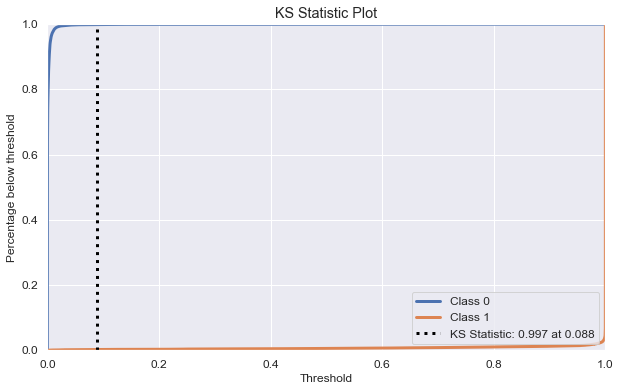

In [146]:
skplt.metrics.plot_ks_statistic(target_test, predict_probs)
plt.show()

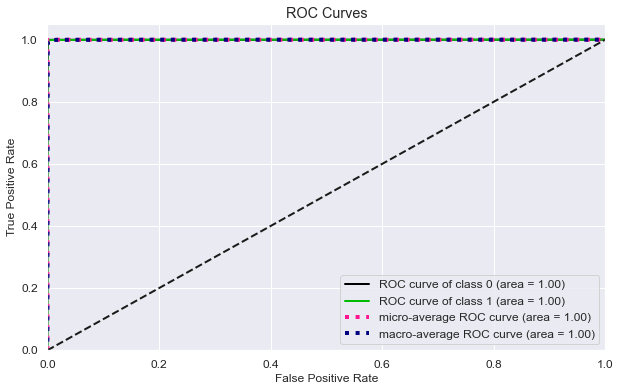

In [147]:
skplt.metrics.plot_roc(target_test, predict_probs)
plt.show()

In [148]:
features = list(data.columns)
features.remove('good_bad')
feature_importance_values = gb.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

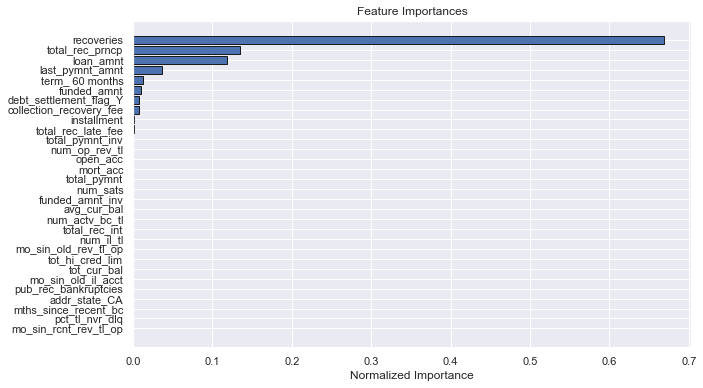

In [149]:
feature_importances_sorted = plot_feature_importances(feature_importances)

# Data Normalization: Rescasing Features using MinMax Scaler

In [150]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train= scaler.fit_transform(features_train)
features_test= scaler.transform(features_test)

# Naive Bayes Classifier

In [151]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

In [152]:
type(target_pred)

numpy.ndarray

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.9278629484580717

In [154]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[79235,  1057],
       [ 6274, 15060]], dtype=int64)

In [155]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(79235, 1057, 6274, 15060)

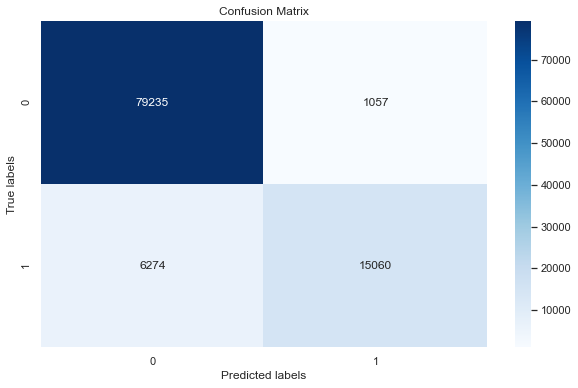

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [157]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy



0.9278629484580717

In [158]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.7059154401424955

In [159]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9868355502416181

In [160]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.9344170751380529

In [161]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9266276064507829

In [162]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.06558292486194706

In [163]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.8042508878267601

In [164]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.8463754951920568

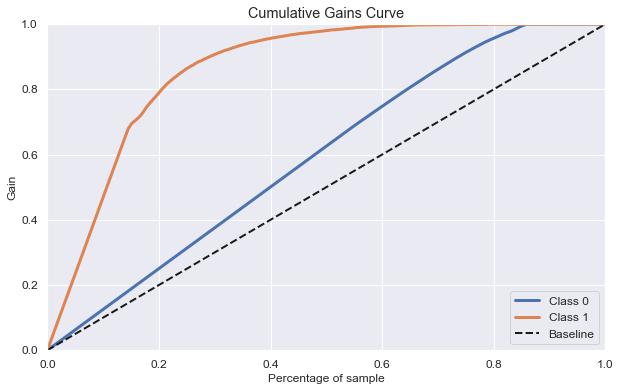

In [165]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

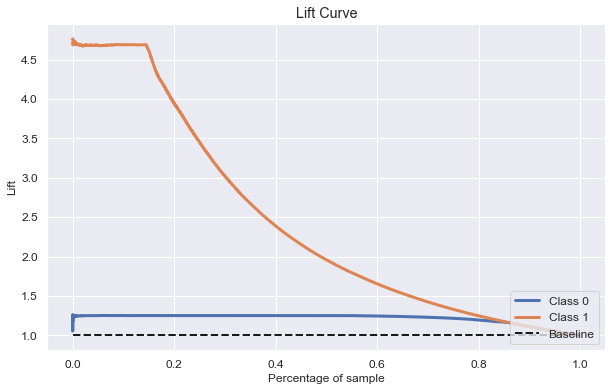

In [166]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

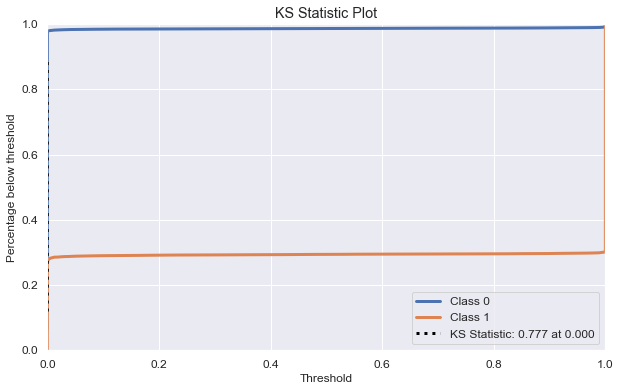

In [167]:
skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()

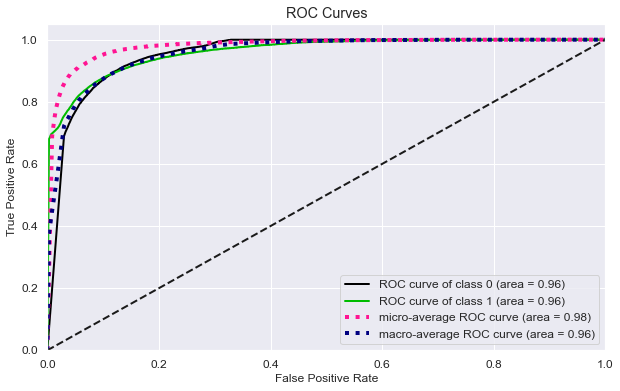

In [168]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.0001)
logreg.fit(features_train, target_train)
target_pred = logreg.predict(features_test)
predicted_probas = logreg.predict_proba(features_test)

In [170]:
target_pred.shape

(101626,)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.8229291716686674

In [172]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[80292,     0],
       [17995,  3339]], dtype=int64)

In [173]:
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(80292, 0, 17995, 3339)

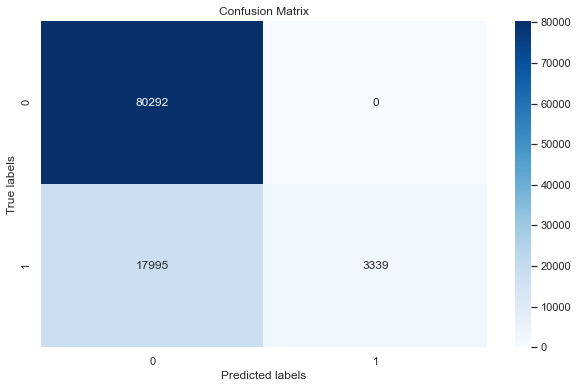

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [175]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.8229291716686674

In [176]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity



0.15651073403956126

In [177]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

1.0

In [178]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

1.0

In [179]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.8169137322331539

In [180]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.0

In [181]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.2706602358853808

In [182]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)



0.5782553670197806

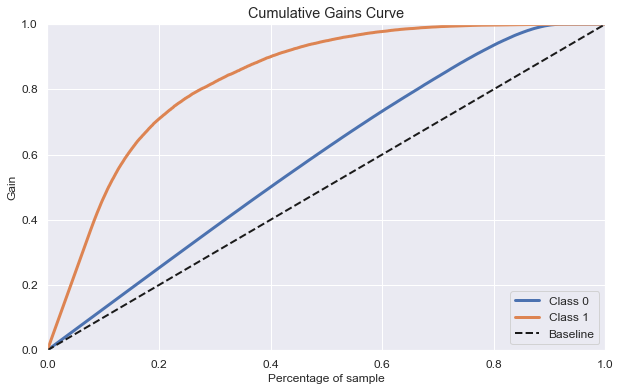

In [183]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(target_test, predicted_probas)
plt.show()

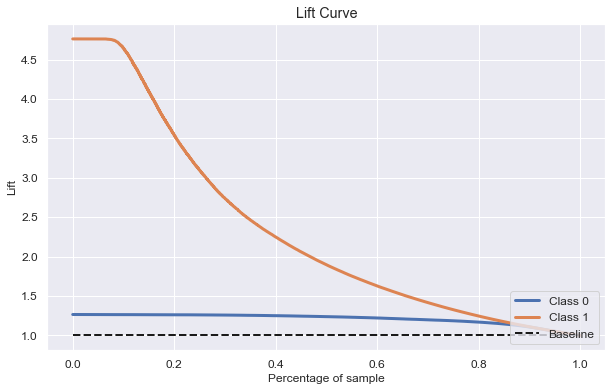

In [184]:
skplt.metrics.plot_lift_curve(target_test, predicted_probas)
plt.show()

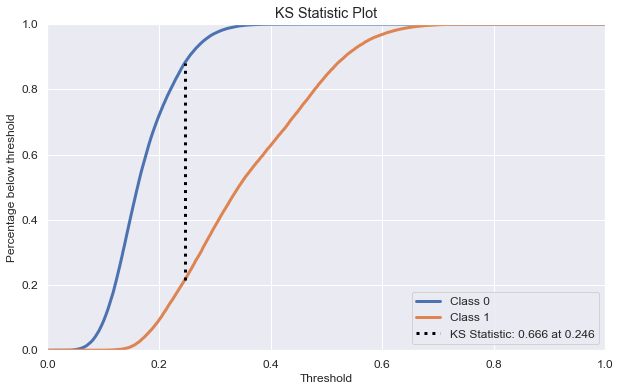

In [185]:


skplt.metrics.plot_ks_statistic(target_test, predicted_probas)
plt.show()



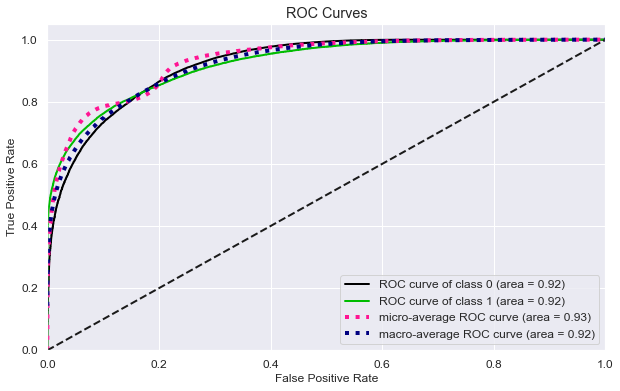

In [186]:
skplt.metrics.plot_roc(target_test, predicted_probas)
plt.show()

# Deep Learning

In [187]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [188]:
features_train=np.array(features_train)
target_train=np.array(target_train)
features_test=np.array(features_test)
target_test=np.array(target_test)

# Deep Neural network with 4 layers

4 layers with 2 hidden layer and the hidden layer has 80 neurons

In [195]:
model = Sequential()
model.add(Dense(80, input_dim=144, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [196]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [197]:
model.fit(features_train, target_train, epochs=100)

Epoch 1/100
12704/12704 [==============================] - 21s 2ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 2/100
12704/12704 [==============================] - 23s 2ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 3/100
12704/12704 [==============================] - 24s 2ms/step - loss: 0.0142 - accuracy: 0.9964
Epoch 4/100
12704/12704 [==============================] - 23s 2ms/step - loss: 0.0128 - accuracy: 0.9968
Epoch 5/100
12704/12704 [==============================] - 23s 2ms/step - loss: 0.0120 - accuracy: 0.9970
Epoch 6/100
12704/12704 [==============================] - 22s 2ms/step - loss: 0.0113 - accuracy: 0.9973
Epoch 7/100
12704/12704 [==============================] - 22s 2ms/step - loss: 0.0107 - accuracy: 0.9974
Epoch 8/100
12704/12704 [==============================] - 26s 2ms/step - loss: 0.0105 - accuracy: 0.9975
Epoch 9/100
12704/12704 [==============================] - 25s 2ms/step - loss: 0.0098 - accuracy: 0.9977
Epoch 10/100
12704/12704 [====================

In [198]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                11600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 81        
Total params: 18,161
Trainable params: 18,161
Non-trainable params: 0
_________________________________________________________________


In [199]:
test_loss, test_acc = model.evaluate(features_test,target_test)

print('Test accuracy:', test_acc)

3176/3176 [==============================] - 3s 1ms/step - loss: 0.0076 - accuracy: 0.9989
Test accuracy: 0.9988880753517151


In [200]:
predictions = model.predict(features_test)

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions.round())

0.9988880798220928

In [202]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[80279,    13],
       [  100, 21234]], dtype=int64)

In [203]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions.round()).ravel() 
TN, FP, FN, TP

(80279, 13, 100, 21234)

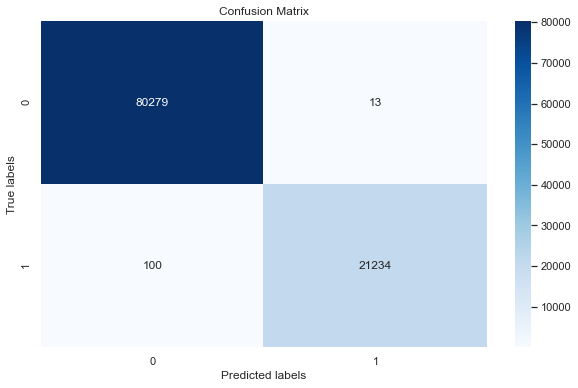

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [205]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.9953126464797976

In [206]:

#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9998380909679669

In [207]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.9993881489151409

In [208]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9987558939524005

In [209]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.0006118510848590608

In [210]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.9973462342359269

In [211]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions )

0.9993205622927146

# Deep Neural network with 5 layers

5 layers with 3 hidden layers, first and second hidden layer has 80 neurons and third hidden layer has 40 neurons

In [215]:
model_1 = Sequential()
model_1 .add(Dense(80, input_dim=144, activation='relu'))
model_1 .add(Dropout(0.2))
model_1 .add(Dense(80, activation='relu'))
model_1 .add(Dropout(0.2))
model_1 .add(Dense(40, activation='relu'))
model_1 .add(BatchNormalization())
model_1 .add(Dense(1, activation='sigmoid'))

In [217]:
model_1.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [218]:
model_1.fit(features_train, target_train, epochs=100)

Epoch 1/100
12704/12704 [==============================] - 23s 2ms/step - loss: 0.0466 - accuracy: 0.9846
Epoch 2/100
12704/12704 [==============================] - 24s 2ms/step - loss: 0.0190 - accuracy: 0.9952
Epoch 3/100
12704/12704 [==============================] - 24s 2ms/step - loss: 0.0160 - accuracy: 0.9962
Epoch 4/100
12704/12704 [==============================] - 32s 3ms/step - loss: 0.0143 - accuracy: 0.9966
Epoch 5/100
12704/12704 [==============================] - 30s 2ms/step - loss: 0.0132 - accuracy: 0.9968
Epoch 6/100
12704/12704 [==============================] - 28s 2ms/step - loss: 0.0130 - accuracy: 0.9970
Epoch 7/100
12704/12704 [==============================] - 26s 2ms/step - loss: 0.0117 - accuracy: 0.9972
Epoch 8/100
12704/12704 [==============================] - 26s 2ms/step - loss: 0.0112 - accuracy: 0.9975
Epoch 9/100
12704/12704 [==============================] - 26s 2ms/step - loss: 0.0108 - accuracy: 0.9975
Epoch 10/100
12704/12704 [====================

In [219]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                11600     
_________________________________________________________________
dropout_6 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 80)                6480      
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 40)                3240      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [220]:

preds = model_1.predict(features_test)

In [221]:
test_loss, test_acc = model_1.evaluate(features_test,target_test)

print('Test accuracy:', test_acc)

3176/3176 [==============================] - 4s 1ms/step - loss: 0.0052 - accuracy: 0.9991
Test accuracy: 0.9990947246551514


In [222]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, preds.round())
cnf_matrix

array([[80286,     6],
       [   86, 21248]], dtype=int64)

In [223]:
TN, FP, FN, TP = confusion_matrix(target_test, preds.round()).ravel() 
TN, FP, FN, TP

(80286, 6, 86, 21248)

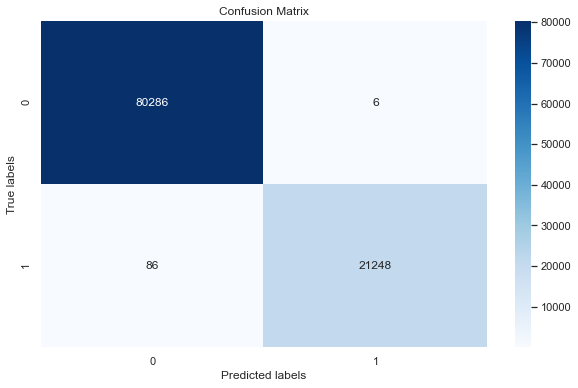

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

In [225]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.9959688759726258

In [226]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.9999252727544463

In [227]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.9997177001976099

In [228]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.9989299756133977

In [229]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.0002822998023901402

In [230]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.9978397670705362

In [231]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, preds )

0.9994300021780909

# Conclusion

**This project estimates the probablity of default model using several machine learning and deep learning algorithms. It trains and tests the PD model using Decision tree, random forest, gradient boosting, Naive Bayes, logistic regression, deep learning neural networks  with five and four layers. Finaly, all of these models are compared based on the probablity of default prediction on the test data. The project uses diffrent performace metrics such as accuracy, precision, recall, ROC curve. Becuase this project focuses on idenetify bad borrowes, I rely more on the Recall/Sensetivity. Accordligly, the overall result shows that  with 99.999 % recal rate, deep learning neural networks with 5 layers performs best.**